In [1]:
import numpy as np
import pandas as pd
import os
import sklearn 

In [8]:
os.chdir('/Users/mayurbansal/documents/github/Dotin-Columbia-Castone-Team-Alpha-/data/Clean Data')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mayurbansal/documents/github/Dotin-Columbia-Castone-Team-Alpha-/data/Clean Data'

In [9]:
os.listdir('..')

['Logistic Regression', 'README.md', '.ipynb_checkpoints']

In [2]:
#read data
data=pd.read_csv("/Users/albertomastrotto/Desktop/Fall_2019 /Capstone/Dotin-Columbia-Castone-Team-Alpha-/Data/Clean Data/merged_data_user_level_V2.csv",index_col=0)


In [3]:
data.head()

,user_id,scroll count,mouse movement count,click count,average_click_delay,NA,User Record Count,Total Time,Total Distance,validation,...,movesup,movesdown,no_vertical_movement,perc_upwward_movement,perc_downward_movement,perc_no_movement_y,system,Max Speed,Avg Speed,Sd Speed
1,0,0,0,0,1.301838,680,680,0.000,0.000000,0,...,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
2,365,11,4766,227,0.886830,0,5005,245.808,62662.118363,0,...,1512,2620,872,30.215827,52.358114,17.426059,pc,2835.321410,0.812244,40.225504
3,371,1,3900,143,0.904714,0,4044,185.388,41381.708124,1,...,1327,1950,766,32.822162,48.231511,18.946327,pc,6285.067883,1.977682,98.953356
4,373,34,5692,225,7.335211,0,5951,200.144,67693.337045,0,...,1719,2539,1693,28.885902,42.665098,28.449000,pc,209.407844,0.380699,4.693707
5,374,32,4666,277,3.378696,0,4975,249.975,115106.227146,1,...,1626,2169,1179,32.689988,43.606755,23.703257,pc,2809.115990,1.010814,40.907223


In [4]:
#fill na values with 0
data['perc_left_movement'].fillna(0,inplace=True)
data['perc_right_movement'].fillna(0,inplace=True)
data['perc_no_movement_x'].fillna(0,inplace=True)
data['average_click_delay'].fillna(0,inplace=True)

### have 2 na values in each of these columns, replacing these with 0 for now

In [5]:
#logistic regression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 52 columns):
user_id                   731 non-null int64
scroll count              731 non-null int64
mouse movement count      731 non-null int64
click count               731 non-null int64
average_click_delay       731 non-null float64
NA                        731 non-null int64
User Record Count         731 non-null int64
Total Time                731 non-null float64
Total Distance            731 non-null float64
validation                731 non-null int64
Min Score Value           731 non-null int64
Max Score Value           731 non-null int64
bf _votes_ 1 _count       731 non-null int64
bf _votes_ 5 _count       731 non-null int64
bf _votes_ 3 _count       731 non-null int64
bs _votes_ 3 _count       731 non-null int64
miq _votes_ 3 _count      731 non-null int64
pgi _votes_ 4 _count      731 non-null int64
bs _votes_ 1 _count       731 non-null int64
bs _votes_ 4 _count       731 non-

In [7]:
# Split data into 'X' features and 'y' target label sets
y = data['validation']
X=data.iloc[:,np.r_[1:7,12:33,36:47]]

### for our first model we have chosen the following variables:

### -scroll count, movement count, click count, total record count
### -max time elapsed, total distance
### -bf_votes_1 etc i.e. choice of answers for each category for each question 
### -movement directions of user i.e. counts of left,right,up,down movements and percentage of each of these movements

## 70,30 split for the model

In [8]:

# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
# Fit the model using the training data
#X_train -> parameter supplies the data features
#y_train -> parameter supplies the target labels
logmodel.fit(X_train, y_train)

/Users/albertomastrotto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = logmodel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.67      0.50      0.57        72
           1       0.78      0.88      0.83       148

    accuracy                           0.75       220
   macro avg       0.72      0.69      0.70       220
weighted avg       0.75      0.75      0.74       220



### Accuracy and other metrics are close to 75% for the first model using some features we created

In [12]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(logmodel, n_features_to_select= 10)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False False False False False  True  True False False False False
  True  True  True  True False  True  True  True False False False False
  True False False False False False False False False False False False
 False False]
[19 18 16  3  8 17  1  1 22  2 23  4  1  1  1  1 21  1  1  1 10 13 11 14
  1  9  6 29 24 25 12 20  7 26 28 27  5 15]


/Users/albertomastrotto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/albertomastrotto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/albertomastrotto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/albertomastrotto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/albertomastrotto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

Index(['bf _votes_ 1 _count', 'bf _votes_ 5 _count', 'bs _votes_ 1 _count',
       'bs _votes_ 4 _count', 'bs _votes_ 5 _count', 'miq _votes_ 1 _count',
       'miq _votes_ 4 _count', 'miq _votes_ 5 _count', 'pgi _votes_ 1 _count',
       'bf _votes_ 4 _count'],
      dtype='object')

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.02554921 0.04093613 0.02408868 0.0299747  0.0013973  0.02370777
 0.03401992 0.01809143 0.02684403 0.02240684 0.02990942 0.02641085
 0.01622725 0.01766224 0.02677763 0.01899111 0.0436119  0.02786254
 0.02288796 0.03708233 0.03459313 0.02204154 0.01910541 0.02317723
 0.02568765 0.02349247 0.0239701  0.02726864 0.02951538 0.02674746
 0.02583843 0.02583869 0.02823522 0.02531585 0.02955032 0.03333122
 0.02732669 0.0345253 ]


/Users/albertomastrotto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<Figure size 640x480 with 1 Axes>

#### Using tree based classifier method for feature selection, we find following features as important:

### - How users answer some questions
### - movements right,left, down etc
### -no of records(scroll+click+moves) by user
### -total time taken by user to complete survey

# GLM MODEL 


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

Accuracy of the GBM on test set: 0.727
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        72
           1       0.78      0.84      0.81       148

    accuracy                           0.73       220
   macro avg       0.69      0.67      0.68       220
weighted avg       0.72      0.73      0.72       220



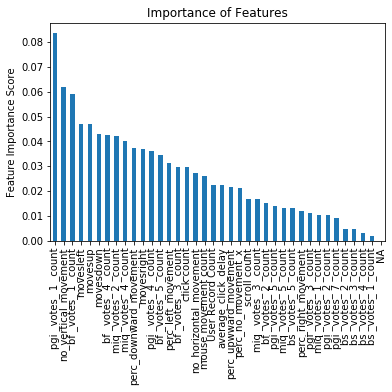

In [15]:
#Run a baseline model without tuning

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

##### Tunign n_estimators and Learning rate
n_estimators captures the number of trees that we add to the model. A high number of trees can be computationally expensive. Generally, with a change in learning rate,n_estimators should also be adjusted (10-fold decrease in learning_rate should go in line with a approx. 10-fold increase in n_estimators.

In [18]:
from sklearn.model_selection import GridSearchCV

p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_


({'mean_fit_time': array([0.18650856, 0.34422846, 0.53002543, 0.65356145, 0.96428337,
         0.76148796, 0.83022952, 1.00771275, 0.14542308, 0.74469776,
         1.16457744, 0.99526906, 0.87400761, 1.01699777, 1.01052938,
         1.51003361, 0.21090188, 0.46120429, 0.90470581, 1.03751822,
         1.41713405, 1.56771846, 1.97382798, 2.135461  , 0.25689006,
         0.52211061, 1.01480823, 1.11483426, 1.90446129, 1.58626423,
         1.90616889, 2.29183278, 0.14110842, 0.38133678, 0.75948672,
         0.99572887, 1.48424931, 1.88370209, 2.39104438, 2.55154734,
         0.21580744, 0.35403113, 0.72788053, 1.08920751, 1.42757988,
         1.79282298, 1.97748494, 2.11066546]),
  'std_fit_time': array([0.02855717, 0.0048586 , 0.02180561, 0.09710897, 0.07014345,
         0.02713464, 0.02311636, 0.16414343, 0.02623858, 0.14649643,
         0.02206829, 0.16430906, 0.02092297, 0.03954438, 0.01309053,
         0.26243541, 0.02269986, 0.01487026, 0.06322797, 0.01964502,
         0.06483165, 0.

##### max_depth
max_depth bounds the maximum depth of the tree. We can use the obtained results to tune the max_depth parameter. There is one interesting comment on depth in the scikit-learn documentation especially relevant for large datasets: "We found that max_leaf_nodes=k gives comparable results to max_depth=k-1 but is significantly faster to train at the expense of a slightly higher training error."

In [21]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.15,n_estimators=100, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.11395721, 0.1095016 , 0.15260162, 0.1920218 , 0.27781701,
         0.30481362]),
  'std_fit_time': array([0.00717189, 0.01040779, 0.00482758, 0.01457133, 0.01277132,
         0.05004454]),
  'mean_score_time': array([0.00282001, 0.00213294, 0.00220876, 0.00229478, 0.0025064 ,
         0.00205026]),
  'std_score_time': array([6.13184201e-04, 8.03065693e-05, 1.02515154e-04, 3.86364645e-05,
         1.90966501e-04, 1.11939958e-04]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'split0_test_score': array([0.76699029, 0.74757282, 0.76699029, 0.72815534, 0.75728155,
         0.74757282]),
  'split1_test_score': array([0.69902913, 0.65048544, 0.69902913, 0.70873786, 0.70873786,
         0.70873786])

##### Tree related parameters: Min sample split and min samples leaf
min_samples_split sets the minimum number of samples to split while min_samples_leaf sets the minimum number of samples to form a leaf (Notice the slight difference).

In [22]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.15, n_estimators=100,max_depth=4, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.23029118, 0.28498211, 0.28540101, 0.21497254, 0.13321095,
         0.14243569, 0.1682076 , 0.16956863, 0.12166462, 0.11824331,
         0.12264524, 0.12297282, 0.12595286, 0.11581788, 0.12093334,
         0.1019712 , 0.09448719, 0.08575926, 0.12199721, 0.11704926,
         0.1212924 , 0.12192779, 0.11599383, 0.10873718, 0.0999228 ,
         0.09666228, 0.09014826, 0.11816339, 0.11570811, 0.11901803,
         0.1145546 , 0.11061831, 0.11217947, 0.10330596, 0.10223303,
         0.08536148, 0.11121464, 0.10934229, 0.10718746, 0.11042919,
         0.1137691 , 0.10889659, 0.09895887, 0.0929265 , 0.07778144]),
  'std_fit_time': array([0.02230866, 0.04440391, 0.03351277, 0.02043057, 0.00714151,
         0.01365548, 0.00616537, 0.0114667 , 0.02481011, 0.00174261,
         0.00476882, 0.00366552, 0.00466149, 0.00283794, 0.01115213,
         0.00757343, 0.00164696, 0.00114529, 0.00364942, 0.00415459,
         0.00360659, 0.00347013, 0.00296735, 0.00219291, 0.00516276,

##### Max features
The square root of features is usually a good starting point. Let's use CV to tune the parameter. The tuning suggests to use 4 features (close to the sqrt of 21).



In [24]:
#TUNING MAX FEATURES

p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.15, n_estimators=100,max_depth=4, min_samples_split=100, min_samples_leaf=3, subsample=1, random_state=10), 
param_grid = p_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_


({'mean_fit_time': array([0.12601409, 0.08793192, 0.08432493, 0.08753681, 0.09700742,
         0.0791954 ]),
  'std_fit_time': array([0.01348495, 0.01205498, 0.0042766 , 0.00676859, 0.00744803,
         0.00770522]),
  'mean_score_time': array([0.00287008, 0.0028985 , 0.00224333, 0.00262136, 0.00302987,
         0.00173416]),
  'std_score_time': array([0.00032393, 0.00132896, 0.00011217, 0.0005922 , 0.0015665 ,
         0.00028301]),
  'param_max_features': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 2},
   {'max_features': 3},
   {'max_features': 4},
   {'max_features': 5},
   {'max_features': 6},
   {'max_features': 7}],
  'split0_test_score': array([0.74757282, 0.73786408, 0.74757282, 0.76699029, 0.75728155,
         0.74757282]),
  'split1_test_score': array([0.68932039, 0.69902913, 0.66990291, 0.72815534, 0.70873786,
         0.69902913]),
 

##### Subsample
Subsample sets the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.


In [25]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.15, n_estimators=100,max_depth=4, min_samples_split=100, min_samples_leaf=3,max_features=6 , random_state=10), 
param_grid = p_test6, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_


({'mean_fit_time': array([0.13904004, 0.10887613, 0.10547047, 0.11131949, 0.11215835,
         0.10317011, 0.0706862 ]),
  'std_fit_time': array([0.02056947, 0.00259798, 0.00497052, 0.00391706, 0.0035631 ,
         0.00724625, 0.01778853]),
  'mean_score_time': array([0.00222745, 0.00246077, 0.00214329, 0.00206981, 0.00293188,
         0.00205445, 0.00167751]),
  'std_score_time': array([9.91627096e-05, 5.86324666e-04, 9.12509355e-05, 1.71446666e-05,
         1.04953253e-03, 7.15500472e-05, 3.55124229e-04]),
  'param_subsample': masked_array(data=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9},
   {'subsample': 0.95},
   {'subsample': 1}],
  'split0_test_score': array([0.70873786, 0.70873786, 0.67961165, 0.75728155, 0.73786408,
         0.72815534, 

Accuracy of the GBM on test set: 0.723
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        72
           1       0.77      0.83      0.80       148

    accuracy                           0.72       220
   macro avg       0.68      0.67      0.67       220
weighted avg       0.71      0.72      0.72       220



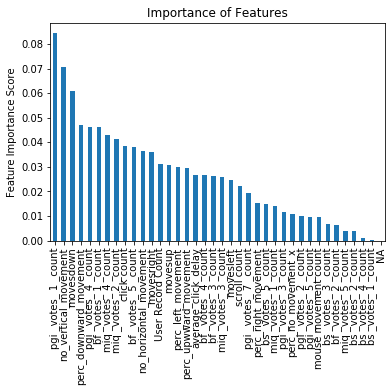

In [26]:
new=GradientBoostingClassifier(learning_rate=0.15, n_estimators=100,max_depth=4, min_samples_split=100, min_samples_leaf=3,max_features=6 , subsample=1, random_state=10)
new.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))